<a href="https://colab.research.google.com/github/miloszpiechota/AI-Systems/blob/main/classification_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liczba klas: 4
Epoch 1/30
57/57 [==============================] - 1s 6ms/step - loss: 1.4287 - accuracy: 0.2856 - val_loss: 1.3863 - val_accuracy: 0.3000
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 1.3113 - accuracy: 0.3611 - val_loss: 1.3140 - val_accuracy: 0.3700
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 1.2344 - accuracy: 0.4111 - val_loss: 1.2275 - val_accuracy: 0.4250
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 1.1285 - accuracy: 0.4761 - val_loss: 1.0959 - val_accuracy: 0.4800
Epoch 5/30
57/57 [==============================] - 0s 3ms/step - loss: 0.9882 - accuracy: 0.5572 - val_loss: 0.9398 - val_accuracy: 0.5900
Epoch 6/30
57/57 [==============================] - 0s 3ms/step - loss: 0.8422 - accuracy: 0.6511 - val_loss: 0.8005 - val_accuracy: 0.6800
Epoch 7/30
57/57 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.7283 - val_loss: 0.6840 - val_accuracy: 0.7350
Epoch

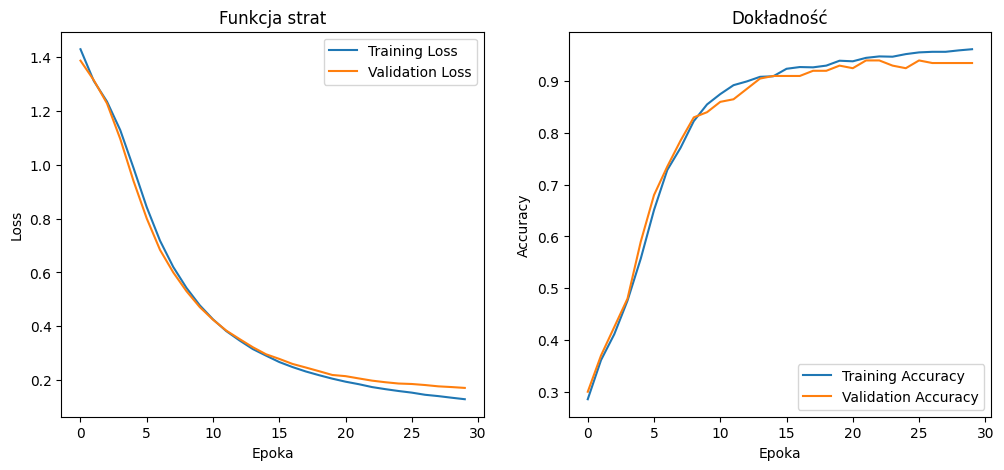

<ipython-input-6-41e2f5ff5b57>:114: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_cv = KerasClassifier(build_fn=build_model, verbose=0)


19/19 [==============================] - 0s 1ms/step
Najlepsza dokładność: 0.7628 uzyskana przy parametrach: {'activation': 'tanh', 'first_neurons': 32, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'adam', 'second_neurons': 24}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import necessary modules from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Import necessary modules from Keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

# 1. Load the dataset (CSV file: 'train.csv')
dataset = pd.read_csv('sample_data/train.csv')
# Assume the dataset contains 20 features and a target column (price class)
X = dataset.iloc[:, :20].values
y = dataset.iloc[:, 20].values  # labels as a 1D array

# 2. Normalize feature data
sc = StandardScaler()
X = sc.fit_transform(X)

# 3. Split data into training and test sets (test = 10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Compute the number of classes (assume we have 4 classes)
num_classes = len(np.unique(y))
print(f"Number of classes: {num_classes}")

# 4. Function to build the neural network (using sparse_categorical_crossentropy)
def create_model(num_layers=3, neurons=[16, 12], activation='relu', optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer

    # Add hidden layers
    if num_layers >= 1:
        model.add(Dense(neurons[0], activation=activation))
    if num_layers >= 2:
        model.add(Dense(neurons[1], activation=activation))

    # Output layer – number of neurons = number of classes (4)
    model.add(Dense(num_classes, activation='softmax'))

    # Set optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = optimizer

    # Compile model
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the default model
model = create_model(num_layers=3, neurons=[16, 12], activation='relu', optimizer='adam', learning_rate=0.001)
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# Visualize the training process
epochs_range = np.arange(len(history.history['loss']))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 5. Function to build the model for grid search
def build_model(num_layers=2, first_neurons=16, second_neurons=12, activation='relu', optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))

    if num_layers >= 1:
        model.add(Dense(first_neurons, activation=activation))
    if num_layers >= 2:
        model.add(Dense(second_neurons, activation=activation))

    model.add(Dense(num_classes, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = optimizer

    # In grid search, we use sparse_categorical_crossentropy loss
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Use KerasClassifier for integration with GridSearchCV
model_cv = KerasClassifier(build_fn=build_model, verbose=0)

param_grid = {
    'num_layers': [1, 2],
    'first_neurons': [16, 32],
    'second_neurons': [12, 24],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01],
    #'epochs': [30, 40],
    #'batch_size': [32, 64]
}

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

grid = GridSearchCV(estimator=model_cv, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stop])

print(f"Best accuracy: {grid_result.best_score_:.4f} achieved with parameters: {grid_result.best_params_}")


In [1]:
 from sklearn.datasets import fetch_openml
 mnist = fetch_openml('mnist_784', as_frame=False)

 print(mnist.DESCR)
 mnist.keys()
X import matplotlib.pyplot as plt
 def plot_digit(image_data):
 image = image_data.reshape(28, 28)
 plt.imshow(image, cmap="binary")
 plt.axis("off")
 some_digit = X[0]
 plot_digit(some_digit)
 plt.show()
  plt.figure(figsize=(9, 9))
 for idx, image_data in enumerate(X[:100]):
 plt.subplot(10, 10, idx + 1)
 plot_digit(image_data)
 plt.subplots_adjust(wspace=0, hspace=0)
 save_fig("more_digits_plot", tight_layout=False)
 plt.show()
  X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
 y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
 y_test_5 = (y_test == '5')
  from sklearn.linear_model import SGDClassifier
 sgd_clf = SGDClassifier(random_state=42)
 sgd_clf.fit(X_train, y_train_5)
 SGDC(random_state=42)
  sgd_clf.predict([some_digit])
  np.array([True])
   from sklearn.model_selection import cross_val_score
 cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
 array[(0.95035,0.96035,0.9604)]
 from sklearn.model_selection import StratifiedKFold
 from sklearn.base import clone
 skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
 # already shuffled
 for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_5[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_5[test_index]
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred))
  from sklearn.dummy import DummyClassifier
 dummy_clf = DummyClassifier()
 dummy_clf.fit(X_train, y_train_5)
 print(any(dummy_clf.predict(X_train)))
 cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
  from sklearn.model_selection import cross_val_predict
 y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
  from sklearn.metrics import confusion_matrix
 cm = confusion_matrix(y_train_5, y_train_pred)
 cm
  y_train_perfect_predictions = y_train_5  # pretend we reached perfection
 confusion_matrix(y_train_5, y_train_perfect_predictions)
 from sklearn.metrics import precision_score, recall_score
 precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)
  # extra code – this cell also computes the precision: TP / (FP + TP)
 cm[1, 1] / (cm[0, 1] + cm[1, 1]
              recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)
  y_scores = sgd_clf.decision_function([some_digit])
 y_scores
  threshold = 0
 y_some_digit_pred = (y_scores > threshold)
   y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")
    from sklearn.metrics import precision_recall_curve
 precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
 plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
 plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
 # extra code – this section just beautifies and saves Figure 3–5
 idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
 plt.plot(thresholds[idx], precisions[idx], "bo")
 plt.plot(thresholds[idx], recalls[idx], "go")
 plt.axis([-50000, 50000, 0, 1])
 plt.grid()
 plt.xlabel("Threshold")
 plt.legend(loc="center right")
 save_fig("precision_recall_vs_threshold_plot")
 plt.show()
  import matplotlib.patches as patches  # extra code – for the curved arrow
 plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
 plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
 # extra code – just beautifies and saves Figure 3–6
 plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
 plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
 plt.plot([recalls[idx]], [precisions[idx]], "ko",
 label="Point at threshold 3,000")
 plt.gca().add_patch(patches.FancyArrowPatch(
 (0.79, 0.60), (0.61, 0.78),
 connectionstyle="arc3,rad=.2",
 arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
 color="#444444"))
 plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
 plt.xlabel("Recall")
 plt.ylabel("Precision")
 plt.axis([0, 1, 0, 1])
 plt.grid()
 plt.legend(loc="lower left")
 save_fig("precision_vs_recall_plot")
 plt.show()
 idx_for_90_precision = (precisions >= 0.90).argmax()
 threshold_for_90_precision = thresholds[idx_for_90_precision]
 threshold_for_90_precision
from sklearn.metrics import roc_curve
 fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
 idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
 tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
 plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
 plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
 plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
 plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
 # extra code – just beautifies and saves Figure 3–7
 plt.gca().add_patch(patches.FancyArrowPatch(
 (0.20, 0.89), (0.07, 0.70),
 connectionstyle="arc3,rad=.4",
 arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
 color="#444444"))
 plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
 plt.xlabel('False Positive Rate (Fall-Out)')
 plt.ylabel('True Positive Rate (Recall)')
 plt.grid()
 plt.axis([0, 1, 0, 1])
 plt.legend(loc="lower right", fontsize=13)
 save_fig("roc_curve_plot")
 plt.show()
 from sklearn.metrics import roc_auc_score
 roc_auc_score(y_train_5, y_scores)
  from sklearn.ensemble import RandomForestClassifier
 forest_clf = RandomForestClassifier(random_state=42)
 y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")
 y_probas_forest[:2]
              # Not in the code
 idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
 print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")
  y_scores_forest = y_probas_forest[:, 1]
 precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
 y_train_5, y_scores_forest)
  plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
 plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
 label="Random Forest")
 plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
 #extra code – saves Figure 3–8
 plt.xlabel("Recall")
 plt.ylabel("Precision")
 plt.axis([0, 1, 0, 1])
 plt.grid()
 plt.legend(loc="lower left")
 save_fig("pr_curve_comparison_plot")
 plt.show()
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
 f1_score(y_train_5, y_train_pred_forest)

#wieloklasowa klasyfikacja
              from sklearn.svm import SVC
 svm_clf = SVC(random_state=42)
 svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5
        svm_clf.predict([some_digit])
                 some_digit_scores = svm_clf.decision_function([some_digit])
 some_digit_scores.round(2)
 # extra code – shows how to get all 45 OvO scores if needed
 svm_clf.decision_function_shape = "ovo"
 some_digit_scores_ovo = svm_clf.decision_function([some_digit])
 some_digit_scores_ovo.round(2)
  from sklearn.multiclass import OneVsRestClassifier
 ovr_clf = OneVsRestClassifier(SVC(random_state=42))
 ovr_clf.fit(X_train[:2000], y_train[:2000])
 from sklearn.metrics import ConfusionMatrixDisplay
 y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
 plt.rc('font', size=9)  # extra code – make the text smaller
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
 plt.show()
 lt.rc('font', size=10)  # extra code
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
 normalize="true", values_format=".0%")
 plt.show()
  sample_weight = (y_train_pred != y_train)
 plt.rc('font', size=10)  # extra code
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
 sample_weight=sample_weight,
 normalize="true", values_format=".0%")
 plt.show()
 # extra code – this cell generates and saves Figure 3–9
 fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
 plt.rc('font', size=9)
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
 axs[0].set_title("Confusion matrix")
 plt.rc('font', size=10)
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
 normalize="true", values_format=".0%")
 axs[1].set_title("CM normalized by row")
 save_fig("confusion_matrix_plot_1")
 plt.show()
 # extra code – this cell generates and saves Figure 3–10
 fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
 plt.rc('font', size=10)
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
 sample_weight=sample_weight,
 normalize="true", values_format=".0%")
 axs[0].set_title("Errors normalized by row")
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
 sample_weight=sample_weight,
 normalize="pred", values_format=".0%")
 axs[1].set_title("Errors normalized by column")
 save_fig("confusion_matrix_plot_2")
 plt.show()
 plt.rc('font', size=14)  # make fonts great agai
              cl_a, cl_b = '3', '5'
 X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
 X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
 X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
 X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
      # extra code – this cell generates and saves Figure 3–11
 size = 5
 pad = 0.2
 plt.figure(figsize=(size, size))
 for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
 (X_aa, (0, 1)), (X_ab, (1, 1))]:
 for idx, image_data in enumerate(images[:size*size]):
 x = idx % size + label_col * (size + pad)
 y = idx // size + label_row * (size + pad)
 plt.imshow(image_data.reshape(28, 28), cmap="binary",
 extent=(x, x + 1, y, y + 1))
 plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
 plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
 plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
 plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
 plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
 plt.xlabel("Predicted label")
 plt.ylabel("True label")
 save_fig("error_analysis_digits_plot")
 plt.show()
       import numpy as np
 from sklearn.neighbors import KNeighborsClassifier
 y_train_large = (y_train >= '7')
 y_train_odd = (y_train.astype('int8') % 2 == 1)
 y_multilabel = np.c_[y_train_large, y_train_odd]
 knn_clf = KNeighborsClassifier()
 knn_clf.fit(X_train, y_multilabel)

             #Kneighbours

              knn_clf.predict([some_digit])
                             y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
 f1_score(y_multilabel, y_train_knn_pred, average="macro")

 # extra code – shows that we get a negligible performance improvement when we
 #
set average="weighted" because the classes are already pretty
 #
well balanced.
 f1_score(y_multilabel, y_train_knn_pred, average="weighted")
  from sklearn.multioutput import ClassifierChain
 chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
 chain_clf.fit(X_train[:2000], y_multilabel[:2000])
 chain_clf.predict([some_digit])

             #klasyfikacja wielowynikowa
              np.random.seed(42)  # to make this code example reproducible
 noise = np.random.randint(0, 100, (len(X_train), 784))
 X_train_mod = X_train + noise
 noise = np.random.randint(0, 100, (len(X_test), 784))
 X_test_mod = X_test + noise
 y_train_mod = X_train
 y_test_mod = X_test
              # extra code – this cell generates and saves Figure 3–12
 plt.subplot(121); plot_digit(X_test_mod[0])
 plt.subplot(122); plot_digit(y_test_mod[0])
 save_fig("noisy_digit_example_plot")
 plt.show()
 knn_clf = KNeighborsClassifier()
 knn_clf.fit(X_train_mod, y_train_mod)
 clean_digit = knn_clf.predict([X_test_mod[0]])
 plot_digit(clean_digit)
 save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
 plt.show(









**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

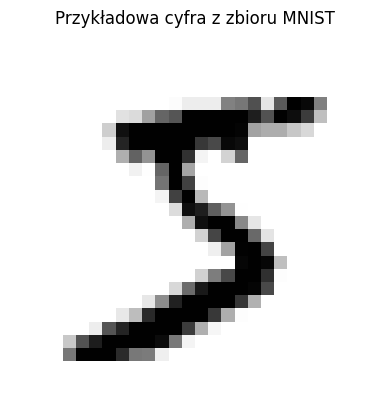

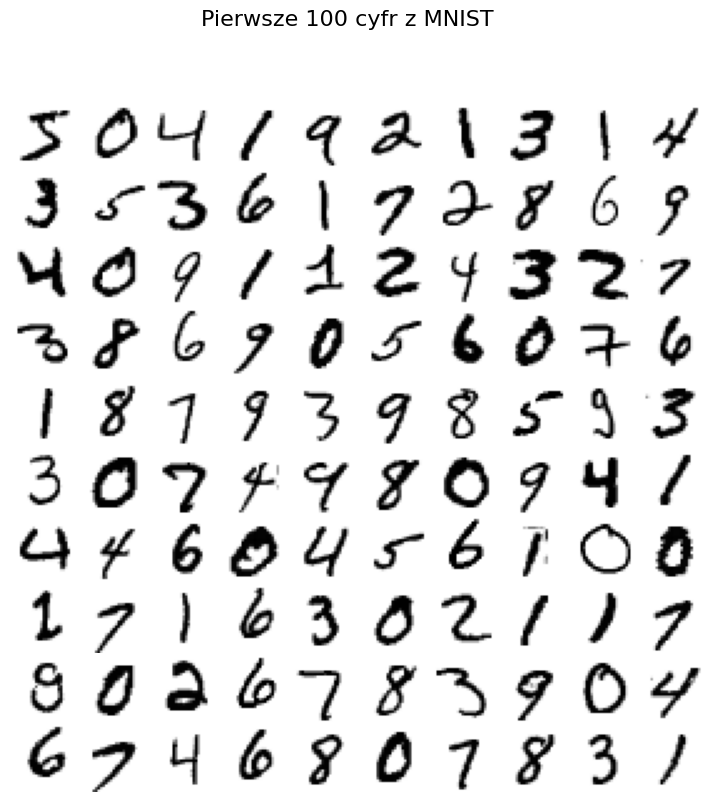

Rozmiar zbioru treningowego: (60000, 784)
Rozmiar zbioru testowego: (10000, 784)
Prediction for the given digit: ['5']
Dokładność (cross_val_score) dla SGDClassifier: [0.95035 0.96035 0.9604 ]
Dokładność dla jednej z iteracji: 0.95035
Dokładność dla jednej z iteracji: 0.96035
Dokładność dla jednej z iteracji: 0.9604
Czy DummyClassifier przewiduje jakiekolwiek 'True'? -> False
Dokładność (cross_val_score) dla DummyClassifier: [0.90965 0.90965 0.90965]
Macierz pomyłek dla SGDClassifier:
[[53892   687]
 [ 1891  3530]]
Macierz pomyłek dla idealnych przewidywań:
[[54579     0]
 [    0  5421]]
Precision: 0.8370879772350012
Recall: 0.6511713705958311
Decision score for some_digit: [2164.22030239]
Predicted label for some_digit: [ True]


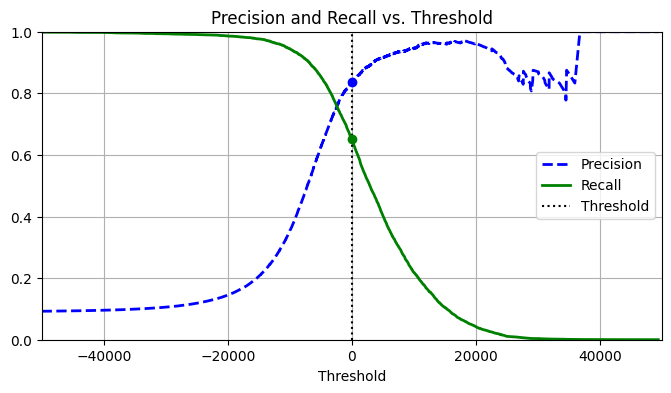

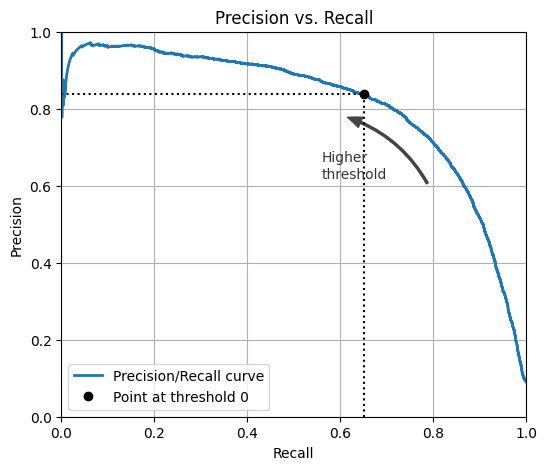

Threshold for at least 90% precision: 3370.0194991439557


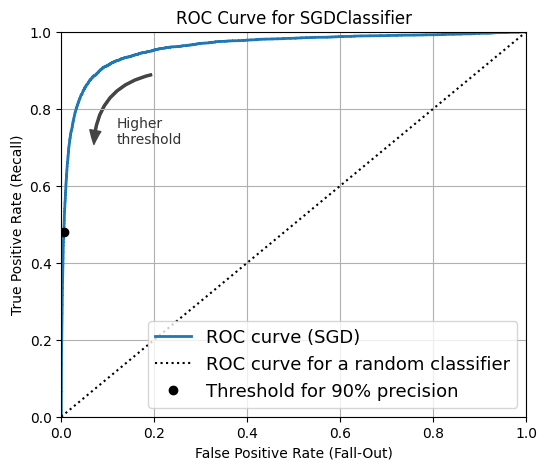

AUC dla SGDClassifier: 0.9604938554008616
Przykładowe prawdopodobieństwa (Random Forest):
 [[0.11 0.89]
 [0.99 0.01]]
Procent przykładów pozytywnych w przedziale 50%-60%: 94.0%


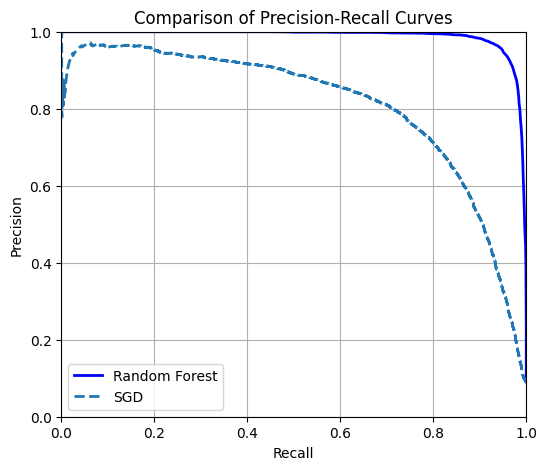

F1-score dla Random Forest: 0.9274509803921569
Prediction (OvO) for some_digit: ['5']
Decision scores (OvO) for some_digit: [[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]
Decision scores (explicit OvO) for some_digit: [[ 0.11 -0.21 -0.97  0.51 -1.01  0.19  0.09 -0.31 -0.04 -0.45 -1.28  0.25
  -1.01 -0.13 -0.32 -0.9  -0.36 -0.93  0.79 -1.    0.45  0.24 -0.24  0.25
   1.54 -0.77  1.11  1.13  1.04  1.2  -1.42 -0.53 -0.45 -0.99 -0.95  1.21
   1.    1.    1.08 -0.02 -0.67 -0.14 -0.3  -0.13  0.25]]
Prediction (OvR) for some_digit: ['5']


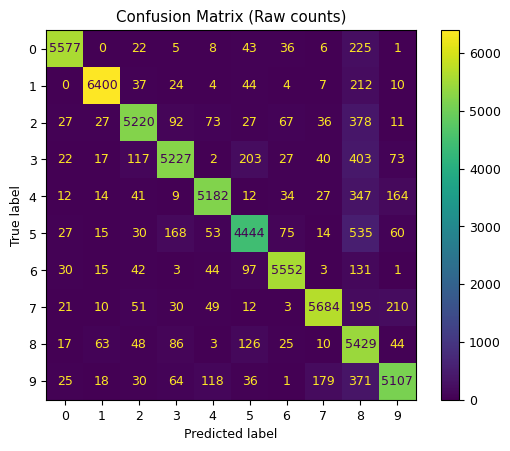

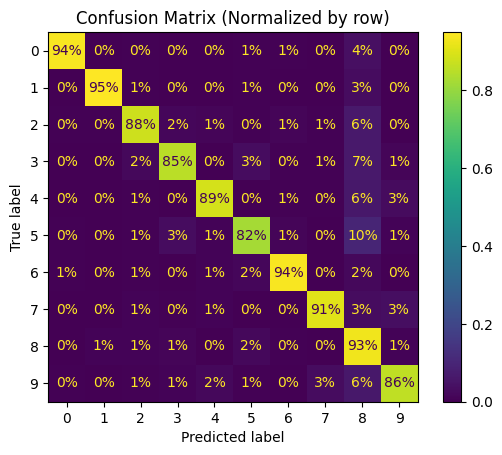

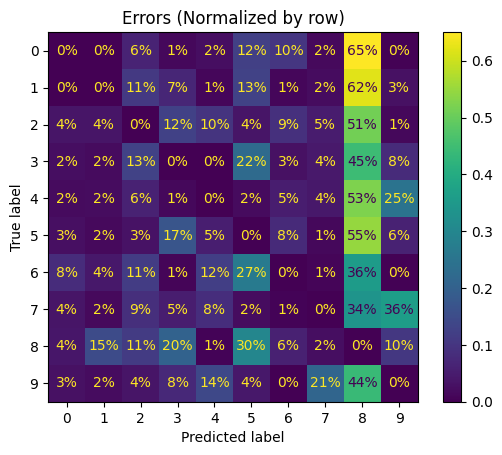

NameError: name 'save_fig' is not defined

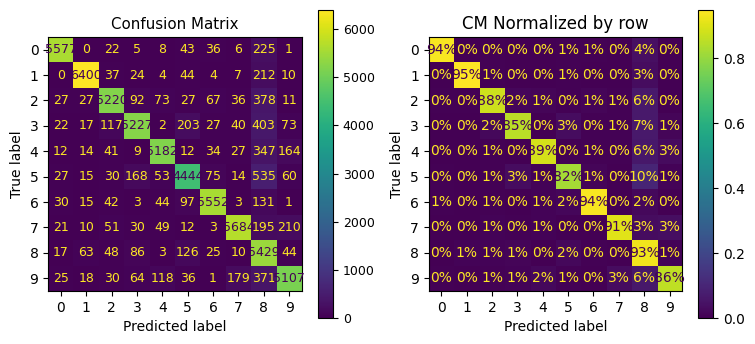

In [6]:
# Etap I: analiza zbioru MNIST
# Importujemy niezbędne moduły
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Pobranie zbioru danych MNIST (28x28 pikseli, 784 cechy) z OpenML
mnist = fetch_openml('mnist_784', as_frame=False)

# Wyświetlenie opisu zbioru danych (informacje o zbiorze, źródle, formacie itp.)
print(mnist.DESCR)

# Wyświetlenie kluczy słownika MNIST, aby zobaczyć, jakie informacje zawiera
print("Keys in the MNIST dataset:", mnist.keys())

# Pobranie danych (cech) oraz etykiet z pobranego zbioru
X = mnist['data']    # macierz obrazów, gdzie każdy obraz jest spłaszczonym wektorem 784 elementów
y = mnist['target']  # etykiety (cyfry od 0 do 9) w formie stringów

# Funkcja do wyświetlania pojedynczego obrazu cyfry
def plot_digit(image_data):
    # Przekształcenie płaskiego wektora na macierz 28x28 pikseli
    image = image_data.reshape(28, 28)
    # Wyświetlenie obrazu w odcieniach szarości (tryb "binary")
    plt.imshow(image, cmap="binary")
    # Ukrycie osi, aby lepiej widzieć cyfrę
    plt.axis("off")

# Wyświetlenie przykładowej cyfry (pierwszego obrazu w zbiorze)
some_digit = X[0]
plt.figure()
plot_digit(some_digit)
plt.title("Przykładowa cyfra z zbioru MNIST")
plt.show()

# Wyświetlenie pierwszych 100 cyfr w siatce 10x10
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
# Dostosowanie odstępów między wykresami
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("Pierwsze 100 cyfr z MNIST", fontsize=16)
plt.show()

# Podział zbioru danych na zbiór treningowy i testowy
# Zakładamy, że pierwszy fragment (60 000 przykładów) to dane treningowe,
# a pozostałe (10 000 przykładów) to dane testowe.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Wyświetlenie informacji o podziale zbioru
print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

# Etap II:
# Przygotowanie danych binarnej klasyfikacji:
# Tworzymy nowe etykiety: True dla cyfr '5' i False dla pozostałych cyfr.
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Importujemy SGDClassifier z modułu sklearn.linear_model
from sklearn.linear_model import SGDClassifier

# Inicjujemy klasyfikator z ustalonym random_state dla powtarzalności wyników
sgd_clf = SGDClassifier(random_state=42)

# Trenujemy klasyfikator na zbiorze treningowym
sgd_clf.fit(X_train, y_train_5)

# Predykcja dla przykładowej cyfry (some_digit)
print("Prediction for the given digit:", prediction)

#Etap III:  Pomiar dokładności za pomocą walidacji krzyżowej
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import clone
from sklearn.dummy import DummyClassifier

# 1. Użycie wbudowanej funkcji cross_val_score
# Obliczenie dokładności modelu sgd_clf przy użyciu 3-krotnej walidacji krzyżowej.
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("Dokładność (cross_val_score) dla SGDClassifier:", cv_scores)

# 2. Ręczne przeprowadzenie walidacji krzyżowej z użyciem StratifiedKFold
skfolds = StratifiedKFold(n_splits=3)  # Warto dodać shuffle=True, jeśli dane nie są wcześniej pomieszane

# Pętla po podziałach uzyskanych z StratifiedKFold
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # Klonujemy klasyfikator, aby każdy trening zaczynał od czystego modelu
    clone_clf = clone(sgd_clf)

    # Wydzielenie podzbiorów treningowych i walidacyjnych
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # Trenowanie sklonowanego modelu na podzbiorze treningowym
    clone_clf.fit(X_train_folds, y_train_folds)

    # Predykcja na zbiorze walidacyjnym
    y_pred = clone_clf.predict(X_test_fold)

    # Obliczenie dokładności jako stosunek poprawnie sklasyfikowanych przykładów
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)
    print("Dokładność dla jednej z iteracji:", accuracy)

# 3. Porównanie z klasyfikatorem dummy
# DummyClassifier działa na zasadzie losowego lub najczęstszej klasy
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Sprawdzenie, czy dummy_clf zwraca jakąś wartość True (czyli czy przewiduje cyfry '5')
print("Czy DummyClassifier przewiduje jakiekolwiek 'True'? ->", any(dummy_clf.predict(X_train)))

# Użycie cross_val_score do oceny DummyClassifier
dummy_cv_scores = cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("Dokładność (cross_val_score) dla DummyClassifier:", dummy_cv_scores)

# Etap IV: Macierz pomyłek
# 1. Importujemy niezbędne moduły do uzyskania prognoz przy użyciu walidacji krzyżowej
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Uzyskujemy prognozy dla zbioru treningowego (3-krotna walidacja krzyżowa)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# 2. Tworzymy macierz pomyłek porównując rzeczywiste etykiety z prognozami klasyfikatora
cm = confusion_matrix(y_train_5, y_train_pred)
print("Macierz pomyłek dla SGDClassifier:")
print(cm)

# 3. Dla porównania - symulujemy idealne przewidywania (perfekcyjny model)
y_train_perfect_predictions = y_train_5  # zakładamy, że model przewidział wszystkie przykłady poprawnie

# Tworzymy macierz pomyłek dla idealnych przewidywań
cm_perfect = confusion_matrix(y_train_5, y_train_perfect_predictions)
print("Macierz pomyłek dla idealnych przewidywań:")
print(cm_perfect)

# Etap V: Precyzja i odzysk
from sklearn.metrics import precision_score, recall_score

# Obliczenie precyzji (precision) – stosunek poprawnych pozytywnych przewidywań do wszystkich przewidywanych jako pozytywne
precision = precision_score(y_train_5, y_train_pred)
print("Precision:", precision)
# Alternatywnie: precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
# gdzie:
# cm[1, 1] - True Positives (TP),
# cm[0, 1] - False Positives (FP)

# Obliczenie odzysku (recall) – stosunek poprawnych pozytywnych przewidywań do wszystkich rzeczywistych pozytywów
recall = recall_score(y_train_5, y_train_pred)
print("Recall:", recall)
# Alternatywnie: recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# gdzie:
# cm[1, 0] - False Negatives (FN),
# cm[1, 1] - True Positives (TP)

# Etap VI: Kompromis między precyzja a odwołaniami
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# 1. Uzyskanie wyniku decyzyjnego dla pojedynczego przykładu (np. some_digit)
# Wynik decyzyjny (y_scores) jest miarą odległości od granicy decyzji
y_scores = sgd_clf.decision_function([some_digit])
print("Decision score for some_digit:", y_scores)

# Ustalamy domyślny próg klasyfikacji
threshold = 0
# Predykcja na podstawie ustalonego progu (True gdy wynik > threshold)
y_some_digit_pred = (y_scores > threshold)
print("Predicted label for some_digit:", y_some_digit_pred)

# 2. Uzyskanie wyników decyzyjnych dla całego zbioru treningowego przy użyciu walidacji krzyżowej
# Używamy metody "decision_function", aby uzyskać wyniki dla każdego przykładu
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# 3. Obliczenie krzywej precision-recall
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Wizualizacja zależności precyzji i odzysku w zależności od progu decyzyjnego
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, colors="k", linestyles="dotted", label="Threshold")

# Znalezienie indeksu pierwszego progu, który jest większy lub równy ustalonemu threshold
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision and Recall vs. Threshold")
plt.show()

# 4. Dodatkowa wizualizacja: krzywa Precision vs. Recall
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
# Rysujemy przerywane linie, aby pokazać punkt odpowiadający ustalonemu progowi
plt.plot([recalls[idx], recalls[idx]], [0.0, precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko", label=f"Point at threshold {threshold}")

# Dodanie strzałki dla wizualizacji (opcjonalne)
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.title("Precision vs. Recall")
plt.show()

# 5. Znalezienie progu, przy którym precyzja wynosi co najmniej 90%
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print("Threshold for at least 90% precision:", threshold_for_90_precision)

# Etap VII: Krzywa ROC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.patches as patches

# 1. Obliczenie krzywej ROC dla klasyfikatora SGD (używamy wcześniej wyznaczonych y_scores)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# Znalezienie indeksu progu odpowiadającego threshold_for_90_precision
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# Wizualizacja krzywej ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve (SGD)")
plt.plot([0, 1], [0, 1], 'k:', label="ROC curve for a random classifier")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
# Dodatkowa dekoracja – strzałka wskazująca zmianę progu
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.title("ROC Curve for SGDClassifier")
plt.show()

# 2. Obliczenie pola pod krzywą ROC (AUC) dla klasyfikatora SGD
auc_score = roc_auc_score(y_train_5, y_scores)
print("AUC dla SGDClassifier:", auc_score)

# 3. Porównanie z klasyfikatorem RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Inicjalizacja i predykcja prawdopodobieństw za pomocą RandomForest
forest_clf = RandomForestClassifier(random_state=42)
# Używamy metody predict_proba, aby uzyskać prawdopodobieństwa przypisania do klasy True
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
# Wyświetlenie pierwszych dwóch wyników predykcji (dla weryfikacji)
print("Przykładowe prawdopodobieństwa (Random Forest):\n", y_probas_forest[:2])

# Analiza przykładów, których prawdopodobieństwo pozytywne mieści się w przedziale (50%, 60%)
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"Procent przykładów pozytywnych w przedziale 50%-60%: {(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

# Wyodrębnienie wyników decyzyjnych dla RandomForest (prawdopodobieństwa klasy True)
y_scores_forest = y_probas_forest[:, 1]

# Obliczenie krzywej Precision-Recall dla RandomForest
from sklearn.metrics import precision_recall_curve
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

# 4. Porównanie krzywych Precision-Recall dla SGD i RandomForest
plt.figure(figsize=(6, 5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.title("Comparison of Precision-Recall Curves")
plt.show()

# 5. Obliczenie F1-score dla RandomForest przy progu 50%
from sklearn.metrics import f1_score
y_train_pred_forest = y_scores_forest >= 0.5  # Przypisanie etykiety True gdy prawdopodobieństwo >= 50%
f1 = f1_score(y_train_5, y_train_pred_forest)
print("F1-score dla Random Forest:", f1)


#Etap VIII: Klasyfikacja wieloklasowa
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# ------------------------------
# Podejście OvO (One-vs-One)
# ------------------------------

# Inicjalizacja klasyfikatora SVC dla klasyfikacji wieloklasowej (domyślnie używa strategii OvO)
svm_clf = SVC(random_state=42)

# Trenowanie modelu na niewielkim podzbiorze danych (2000 przykładów) – używamy etykiet oryginalnych (y_train)
svm_clf.fit(X_train[:2000], y_train[:2000])

# Predykcja dla przykładowej cyfry
prediction = svm_clf.predict([some_digit])
print("Prediction (OvO) for some_digit:", prediction)

# Pobieramy wyniki funkcji decyzyjnej – dla SVC w trybie OvO, zwraca ona jedną wartość na każdą parę klas
some_digit_scores = svm_clf.decision_function([some_digit])
print("Decision scores (OvO) for some_digit:", some_digit_scores.round(2))

# Jeśli chcielibyśmy jawnie ustawić tryb OvO (domyślnie SVC używa OvO przy wieloklasowej klasyfikacji)
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
print("Decision scores (explicit OvO) for some_digit:", some_digit_scores_ovo.round(2))


# ------------------------------
# Podejście OvR (One-vs-Rest)
# ------------------------------

# Inicjalizacja klasyfikatora OvR na bazie SVC
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

# Przykładowa predykcja przy użyciu OvR
ovr_prediction = ovr_clf.predict([some_digit])
print("Prediction (OvR) for some_digit:", ovr_prediction)

#Etap IX: Klasywikacja wieloklasowa - Analiza Bledow
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Assume that:
# - X_train_scaled is the scaled version of X_train,
# - y_train contains the true labels (as strings, e.g., '3', '5', etc.),
# - save_fig is a utility function that saves the current figure to disk.

# ------------------------------------------------------------------------------
# Step 1: Compute predictions via cross-validation for error analysis.
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))  # Konwersja do float w razie potrzeby
X_test_scaled = scaler.transform(X_test.astype(float))

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# ------------------------------------------------------------------------------
# Display the raw confusion matrix (not normalized).
# ------------------------------------------------------------------------------
plt.rc('font', size=9)  # Make the text smaller for better display.
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Confusion Matrix (Raw counts)")
plt.show()

# ------------------------------------------------------------------------------
# Display a normalized confusion matrix (normalized by row, values in percentage).
# ------------------------------------------------------------------------------
plt.rc('font', size=10)  # Increase font size a bit.
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.title("Confusion Matrix (Normalized by row)")
plt.show()

# ------------------------------------------------------------------------------
# Use sample_weight to emphasize errors: weight errors as 1 and correct predictions as 0.
# ------------------------------------------------------------------------------
sample_weight = (y_train_pred != y_train)  # 1 for errors, 0 for correct predictions

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                          sample_weight=sample_weight,
                                          normalize="true", values_format=".0%")
plt.title("Errors (Normalized by row)")
plt.show()

# ------------------------------------------------------------------------------
# Display two side-by-side confusion matrices: one raw and one normalized.
# ------------------------------------------------------------------------------
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion Matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                          normalize="true", values_format=".0%")
axs[1].set_title("CM Normalized by row")
save_fig("confusion_matrix_plot_1")  # extra code – saves the figure
plt.show()

# ------------------------------------------------------------------------------
# Display two side-by-side confusion matrices for errors:
# One normalized by row and the other normalized by column.
# ------------------------------------------------------------------------------
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                          sample_weight=sample_weight,
                                          normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                          sample_weight=sample_weight,
                                          normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()

# ------------------------------------------------------------------------------
# Analyze classification errors between two specific classes.
# In this example, we choose class '3' and class '5'.
# ------------------------------------------------------------------------------
plt.rc('font', size=14)  # Increase font size for the final visualization.
cl_a, cl_b = '3', '5'

# Extract images that were misclassified:
# X_aa: True label = cl_a, Predicted label = cl_a (correct predictions for class cl_a)
# X_ab: True label = cl_a, Predicted label = cl_b (errors: cl_a misclassified as cl_b)
# X_ba: True label = cl_b, Predicted label = cl_a (errors: cl_b misclassified as cl_a)
# X_bb: True label = cl_b, Predicted label = cl_b (correct predictions for class cl_b)
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# Plot a grid showing examples from each category.
size = 5   # grid size (5x5 images per cell)
pad = 0.2  # padding between images
plt.figure(figsize=(size, size))
# Loop over each cell: (images, (column_label, row_label))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size * size]):
        # Calculate x and y position for each image in the grid cell.
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
# Set x and y ticks to show the predicted and true labels.
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
# Draw dotted lines to separate cells.
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.title("Error Analysis for classes {} and {}".format(cl_a, cl_b))
plt.show()

#Etap X: Klasywikacja wielocechowa
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

# ------------------------------------------------------------------------------
# 1. Definicja etykiet dla klasyfikacji wielocechowej:
#
#    a) y_train_large: True, jeśli etykieta (cyfra) jest >= '7'
#    b) y_train_odd: True, jeśli etykieta (cyfra) jest nieparzysta
#
# UWAGA: Wartości w y_train są typu string, dlatego konwersja do int8 umożliwia
# obliczenia modulo (sprawdzanie parzystości).
# ------------------------------------------------------------------------------
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)

# Łączymy etykiety w jedną macierz: każda kolumna odpowiada innej cechy
y_multilabel = np.c_[y_train_large, y_train_odd]

# ------------------------------------------------------------------------------
# 2. Klasyfikacja multilabel przy użyciu KNeighborsClassifier:
# ------------------------------------------------------------------------------
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# Predykcja dla przykładowej cyfry (some_digit)
print("KNeighborsClassifier prediction for some_digit:", knn_clf.predict([some_digit]))

# Ocena modelu przy użyciu walidacji krzyżowej
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Obliczenie f1_score – average="macro" uwzględnia średnią niezależnie od liczebności klas,
# natomiast average="weighted" dodatkowo uwzględnia ich proporcje (tu efekt jest znikomy, bo etykiety są dość zbalansowane).
f1_macro = f1_score(y_multilabel, y_train_knn_pred, average="macro")
f1_weighted = f1_score(y_multilabel, y_train_knn_pred, average="weighted")

print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

# ------------------------------------------------------------------------------
# 3. Klasyfikacja multilabel przy użyciu ClassifierChain:
#
# ClassifierChain to podejście, które modeluje zależności między etykietami,
# ucząc sekwencyjnie klasyfikatory, gdzie wynik poprzedniego modelu jest dodawany
# jako dodatkowa cecha dla kolejnego.
# ------------------------------------------------------------------------------
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])  # trenowanie na mniejszym zbiorze dla przyspieszenia

# Predykcja dla przykładowej cyfry przy użyciu modelu ClassifierChain
chain_prediction = chain_clf.predict([some_digit])
print("ClassifierChain prediction for some_digit:", chain_prediction)

#Etap XI: Klasyfikacja wieolowynikowa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Funkcja do rysowania cyfr
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Ustawienie ziarna losowości dla powtarzalności wyników
np.random.seed(42)

# ------------------------------------------------------------------------------
# 1. Dodanie szumu do obrazów cyfr
# ------------------------------------------------------------------------------
noise = np.random.randint(0, 100, (len(X_train), 784))  # Szum dla zbioru treningowego
X_train_mod = X_train + noise  # Zaszumiony zbiór treningowy

noise = np.random.randint(0, 100, (len(X_test), 784))  # Szum dla zbioru testowego
X_test_mod = X_test + noise  # Zaszumiony zbiór testowy

# Prawidłowe etykiety to oryginalne, czyste obrazy cyfr
y_train_mod = X_train
y_test_mod = X_test

# ------------------------------------------------------------------------------
# 2. Wytrenowanie modelu KNeighborsClassifier do oczyszczania obrazów
# ------------------------------------------------------------------------------
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

# ------------------------------------------------------------------------------
# 3. Testowanie modelu na jednym przykładzie
# ------------------------------------------------------------------------------
plt.figure(figsize=(8, 4))

# Wyświetlenie zaszumionego obrazu
plt.subplot(121)
plot_digit(X_test_mod[0])
plt.title("Zaszumiona cyfra")
save_fig("noisy_digit_example_plot")  # Zapis obrazu do pliku

# Oczyszczenie obrazu przy użyciu modelu
clean_digit = knn_clf.predict([X_test_mod[0]])  # Model przewiduje czysty obraz

# Wyświetlenie oczyszczonego obrazu
plt.subplot(122)
plot_digit(clean_digit)
plt.title("Oczyszczona cyfra")
save_fig("cleaned_digit_example_plot")  # Zapis oczyszczonego obrazu do pliku

plt.show()



